In [5]:
import numpy as np
import pandas as pd
import torch
from scipy.signal import resample

In [6]:
json1 = pd.read_json('data/keypoints_dataset_jester_folder_1-1499.json', orient='records')

In [7]:
json2 = pd.read_json('data/keypoints_dataset_jester_folder_1500-4999.json', orient='records')

In [8]:
Keypoints = pd.concat((json1, json2), ignore_index=True)

In [9]:
Keypoints.head()

,Folder,Frame No.,Keypoints,Box
0,1,5,"[71.18362441043337, 68.27197008330492, 72.3781...","[80.39924621582031, 46.05924987792966, 91.6939..."
1,1,7,"[69.83849870482071, 62.4668899475505, 72.35690...","[85.12232971191406, 50.941932678222656, 89.655..."
2,1,9,"[68.60981780015935, 67.51211995154517, 70.5342...","[82.1515426635742, 48.446037292480455, 91.1560..."
3,1,20,"[71.16167460980161, 70.90062787466923, 73.2007...","[85.59571838378906, 48.76664733886719, 95.5196..."
4,1,25,"[73.07416239378382, 70.24573793811214, 74.7623...","[86.50570678710939, 47.50288391113283, 93.8071..."


In [10]:
len(Keypoints)

135173

In [11]:
np.max(np.max(Keypoints['Keypoints'].values))

183.8392550700464

In [12]:
Keypoints.describe()

,Folder,Frame No.
count,135173.000000,135173.000000
mean,2495.087340,18.568612
std,1442.569846,10.073686
min,1.000000,1.000000
25%,1249.000000,10.000000
50%,2488.000000,19.000000
75%,3750.000000,27.000000
max,4999.000000,47.000000


In [13]:
keypoint_xy = Keypoints['Keypoints'].apply(lambda x: np.array(x).reshape(-1,2))

In [14]:
keypoint_xy.head()

0    [[71.18362441043337, 68.27197008330492], [72.3...
1    [[69.83849870482071, 62.4668899475505], [72.35...
2    [[68.60981780015935, 67.51211995154517], [70.5...
3    [[71.16167460980161, 70.90062787466923], [73.2...
4    [[73.07416239378382, 70.24573793811214], [74.7...
Name: Keypoints, dtype: object

In [15]:
keypoint_xy[0].shape

(21, 2)

In [16]:
keypoints_normalize = keypoint_xy.apply(lambda keypoints: [[keypoint[0]/200, keypoint[1]/100] for keypoint in keypoints])

In [17]:
keypoints_normalize.head()

0    [[0.35591812205216683, 0.6827197008330492], [0...
1    [[0.34919249352410353, 0.624668899475505], [0....
2    [[0.3430490890007967, 0.6751211995154517], [0....
3    [[0.35580837304900803, 0.7090062787466923], [0...
4    [[0.36537081196891913, 0.7024573793811214], [0...
Name: Keypoints, dtype: object

In [18]:
np.max(np.max(keypoints_normalize.values))

0.919196275350232

In [19]:
Keypoints['Keypoints'] = keypoints_normalize.apply(lambda x: np.array(x).reshape(-1))

In [20]:
len(Keypoints['Keypoints'][0])

42

In [21]:
Keypoints.head()

,Folder,Frame No.,Keypoints,Box
0,1,5,"[0.35591812205216683, 0.6827197008330492, 0.36...","[80.39924621582031, 46.05924987792966, 91.6939..."
1,1,7,"[0.34919249352410353, 0.624668899475505, 0.361...","[85.12232971191406, 50.941932678222656, 89.655..."
2,1,9,"[0.3430490890007967, 0.6751211995154517, 0.352...","[82.1515426635742, 48.446037292480455, 91.1560..."
3,1,20,"[0.35580837304900803, 0.7090062787466923, 0.36...","[85.59571838378906, 48.76664733886719, 95.5196..."
4,1,25,"[0.36537081196891913, 0.7024573793811214, 0.37...","[86.50570678710939, 47.50288391113283, 93.8071..."


In [22]:
import itertools

In [23]:
keypoint_combinations = keypoints_normalize.apply(lambda x: np.array(list(itertools.combinations(x, 2))))

In [24]:
keypoint_combinations.head()

0    [[[0.35591812205216683, 0.6827197008330492], [...
1    [[[0.34919249352410353, 0.624668899475505], [0...
2    [[[0.3430490890007967, 0.6751211995154517], [0...
3    [[[0.35580837304900803, 0.7090062787466923], [...
4    [[[0.36537081196891913, 0.7024573793811214], [...
Name: Keypoints, dtype: object

In [25]:
len(keypoint_combinations[0])

210

In [26]:
keypoint_distance = keypoint_combinations.apply(lambda x: [np.linalg.norm(combination[0]-combination[1]) for combination in x])

In [27]:
keypoint_distance = keypoint_distance.apply(lambda x: np.array(x)/np.array(x).max())

In [28]:
keypoint_distance.head()

0    [0.5279238659837312, 0.7507002355649847, 0.864...
1    [0.31163687528270634, 0.43203862251419084, 0.5...
2    [0.5183603521999641, 0.7078180869242696, 0.825...
3    [0.47897337276861596, 0.6175335256739554, 0.77...
4    [0.3328736490610312, 0.4181547754352144, 0.548...
Name: Keypoints, dtype: object

In [29]:
len(keypoint_distance[0])

210

In [30]:
Keypoints['Distance'] = keypoint_distance

In [31]:
Keypoints.head()

,Folder,Frame No.,Keypoints,Box,Distance
0,1,5,"[0.35591812205216683, 0.6827197008330492, 0.36...","[80.39924621582031, 46.05924987792966, 91.6939...","[0.5279238659837312, 0.7507002355649847, 0.864..."
1,1,7,"[0.34919249352410353, 0.624668899475505, 0.361...","[85.12232971191406, 50.941932678222656, 89.655...","[0.31163687528270634, 0.43203862251419084, 0.5..."
2,1,9,"[0.3430490890007967, 0.6751211995154517, 0.352...","[82.1515426635742, 48.446037292480455, 91.1560...","[0.5183603521999641, 0.7078180869242696, 0.825..."
3,1,20,"[0.35580837304900803, 0.7090062787466923, 0.36...","[85.59571838378906, 48.76664733886719, 95.5196...","[0.47897337276861596, 0.6175335256739554, 0.77..."
4,1,25,"[0.36537081196891913, 0.7024573793811214, 0.37...","[86.50570678710939, 47.50288391113283, 93.8071...","[0.3328736490610312, 0.4181547754352144, 0.548..."


In [32]:
# keypoint_difference = keypoint_combinations.apply(lambda x: [combination[0]-combination[1] for combination in x])

In [33]:
# keypoint_difference.head()

In [34]:
# len(keypoint_distance[0])

In [35]:
keypoint_sequence = Keypoints.pivot_table(index=['Folder'], values=['Keypoints', 'Distance'], aggfunc=lambda x: np.vstack(x).tolist()).reset_index()
# dataset = dataset.to_frame()

In [36]:
keypoint_sequence.head()

,Folder,Distance,Keypoints
0,1,"[[0.5279238659837312, 0.7507002355649847, 0.86...","[[0.35591812205216683, 0.6827197008330492, 0.3..."
1,2,"[[0.21662651268670463, 0.38238816508468837, 0....","[[0.23852788661866614, 0.9772922076104805, 0.3..."
2,3,"[[0.2199794708329654, 0.4099474041833216, 0.59...","[[0.3304288189461842, 0.9523916275517967, 0.38..."
3,4,"[[0.35118453378666226, 0.6100496690636886, 0.8...","[[0.5841567827604877, 0.7659518744012982, 0.59..."
4,5,"[[0.15293741057745394, 0.2685804374944105, 0.3...","[[0.6971858186067584, 0.6021568528372521, 0.64..."


In [37]:
len(keypoint_sequence['Keypoints'][0][0])

42

In [38]:
len(keypoint_sequence['Distance'][0][0])

210

In [39]:
keypoint_velocity = keypoint_sequence['Keypoints'].apply(lambda x: np.array(x).reshape(-1,21,2))

In [40]:
keypoint_velocity = keypoint_velocity.apply(lambda x: [np.linalg.norm(x[frame][joint] - x[frame+1][joint]) for joint in range(21) for frame in range(len(x)-1)])

In [41]:
keypoint_velocity = keypoint_velocity.apply(lambda x: np.array(x).reshape(-1,21))

In [42]:
keypoint_velocity = keypoint_velocity.apply(lambda x: np.vstack((np.zeros((1,21)), x)))

In [43]:
keypoint_velocity = keypoint_velocity.apply(lambda x: np.array(x)/np.array(x).max())

In [44]:
keypoint_velocity.head()

0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: Keypoints, dtype: object

In [45]:
len(keypoint_velocity[0][0])

21

In [46]:
keypoint_sequence['Velocity'] = keypoint_velocity

In [47]:
keypoint_sequence.head()

,Folder,Distance,Keypoints,Velocity
0,1,"[[0.5279238659837312, 0.7507002355649847, 0.86...","[[0.35591812205216683, 0.6827197008330492, 0.3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,2,"[[0.21662651268670463, 0.38238816508468837, 0....","[[0.23852788661866614, 0.9772922076104805, 0.3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,3,"[[0.2199794708329654, 0.4099474041833216, 0.59...","[[0.3304288189461842, 0.9523916275517967, 0.38...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,4,"[[0.35118453378666226, 0.6100496690636886, 0.8...","[[0.5841567827604877, 0.7659518744012982, 0.59...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,5,"[[0.15293741057745394, 0.2685804374944105, 0.3...","[[0.6971858186067584, 0.6021568528372521, 0.64...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [48]:
dataset = keypoint_sequence.copy()

In [49]:
dataset['Feature'] = keypoint_sequence.apply(lambda x: np.hstack((x[1], x[2], x[3])), axis=1)

In [50]:
dataset.drop(inplace=True, columns=['Distance', 'Keypoints', 'Velocity'])

In [51]:
dataset.head()

,Folder,Feature
0,1,"[[0.5279238659837312, 0.7507002355649847, 0.86..."
1,2,"[[0.21662651268670463, 0.38238816508468837, 0...."
2,3,"[[0.2199794708329654, 0.4099474041833216, 0.59..."
3,4,"[[0.35118453378666226, 0.6100496690636886, 0.8..."
4,5,"[[0.15293741057745394, 0.2685804374944105, 0.3..."


In [52]:
dataset.iloc[0,1].shape

(7, 273)

In [53]:
dataset.iloc[0,1].max()

1.0

In [54]:
csv_train = pd.read_csv('data/jester-v1-train.csv', header = None)  
csv_train.head()

,0,1
0,1,Doing other things
1,3,Pushing Two Fingers Away
2,4,Swiping Right
3,5,Rolling Hand Backward
4,6,Drumming Fingers


In [55]:
csv_validation = pd.read_csv('data/jester-v1-validation.csv', header = None)  
csv_validation.head()

,0,1
0,16,Thumb Down
1,22,Zooming In With Full Hand
2,23,Sliding Two Fingers Right
3,30,Swiping Down
4,35,Drumming Fingers


In [56]:
csv = pd.concat([csv_train, csv_validation])
csv.head()

,0,1
0,1,Doing other things
1,3,Pushing Two Fingers Away
2,4,Swiping Right
3,5,Rolling Hand Backward
4,6,Drumming Fingers


In [57]:
label = pd.read_csv('data/jester-v1-labels.csv', header = None)  
label.head()

,0
0,Swiping Left
1,Swiping Right
2,Swiping Down
3,Swiping Up
4,Pushing Hand Away


In [58]:
label = label.reset_index()[[0, 'index']]

In [59]:
label_dict = {row[0]: row[1] for row in label.values}

In [60]:
label_dict

{'Swiping Left': 0,
 'Swiping Right': 1,
 'Swiping Down': 2,
 'Swiping Up': 3,
 'Pushing Hand Away': 4,
 'Pulling Hand In': 5,
 'Sliding Two Fingers Left': 6,
 'Sliding Two Fingers Right': 7,
 'Sliding Two Fingers Down': 8,
 'Sliding Two Fingers Up': 9,
 'Pushing Two Fingers Away': 10,
 'Pulling Two Fingers In': 11,
 'Rolling Hand Forward': 12,
 'Rolling Hand Backward': 13,
 'Turning Hand Clockwise': 14,
 'Turning Hand Counterclockwise': 15,
 'Zooming In With Full Hand': 16,
 'Zooming Out With Full Hand': 17,
 'Zooming In With Two Fingers': 18,
 'Zooming Out With Two Fingers': 19,
 'Thumb Up': 20,
 'Thumb Down': 21,
 'Shaking Hand': 22,
 'Stop Sign': 23,
 'Drumming Fingers': 24,
 'No gesture': 25,
 'Doing other things': 26}

In [61]:
csv_final = csv.replace({1: label_dict})

In [62]:
csv_final = csv_final.rename(columns={0: "Folder", 1: "Label"})

In [63]:
csv_final.head()

,Folder,Label
0,1,26
1,3,10
2,4,1
3,5,13
4,6,24


In [64]:
dataset = dataset.set_index('Folder').join(csv_final.set_index('Folder'))

In [65]:
dataset.head()

,Feature,Label
Folder,,
1,"[[0.5279238659837312, 0.7507002355649847, 0.86...",26.0
2,"[[0.21662651268670463, 0.38238816508468837, 0....",NaN
3,"[[0.2199794708329654, 0.4099474041833216, 0.59...",10.0
4,"[[0.35118453378666226, 0.6100496690636886, 0.8...",1.0
5,"[[0.15293741057745394, 0.2685804374944105, 0.3...",13.0


In [66]:
dataset = dataset.dropna()

In [67]:
dataset = dataset[dataset.Label != 26]

In [68]:
dataset = dataset[dataset.Label != 25]

In [69]:
dataset = dataset.reset_index(drop=True)
dataset.head()

,Feature,Label
0,"[[0.2199794708329654, 0.4099474041833216, 0.59...",10.0
1,"[[0.35118453378666226, 0.6100496690636886, 0.8...",1.0
2,"[[0.15293741057745394, 0.2685804374944105, 0.3...",13.0
3,"[[0.17019057048619474, 0.32694225501610247, 0....",24.0
4,"[[0.396742519313019, 0.547616933373741, 0.5765...",6.0


In [70]:
dataset['Length'] = dataset['Feature'].apply(lambda x: len(x))

In [71]:
dataset.head()

,Feature,Label,Length
0,"[[0.2199794708329654, 0.4099474041833216, 0.59...",10.0,32
1,"[[0.35118453378666226, 0.6100496690636886, 0.8...",1.0,22
2,"[[0.15293741057745394, 0.2685804374944105, 0.3...",13.0,21
3,"[[0.17019057048619474, 0.32694225501610247, 0....",24.0,19
4,"[[0.396742519313019, 0.547616933373741, 0.5765...",6.0,29


In [72]:
dataset.groupby(by="Length").count()

,Feature,Label
Length,,
1,3,3
2,8,8
3,11,11
4,5,5
5,9,9
6,12,12
7,17,17
8,19,19
9,34,34


In [73]:
dataset.describe()

,Label,Length
count,3951.000000,3951.000000
mean,11.984055,27.482916
std,7.336919,8.155585
min,0.000000,1.000000
25%,6.000000,22.000000
50%,12.000000,29.000000
75%,19.000000,34.000000
max,24.000000,47.000000


In [74]:
dataset_filter = dataset[dataset['Length']>10]
dataset_filter.head()

,Feature,Label,Length
0,"[[0.2199794708329654, 0.4099474041833216, 0.59...",10.0,32
1,"[[0.35118453378666226, 0.6100496690636886, 0.8...",1.0,22
2,"[[0.15293741057745394, 0.2685804374944105, 0.3...",13.0,21
3,"[[0.17019057048619474, 0.32694225501610247, 0....",24.0,19
4,"[[0.396742519313019, 0.547616933373741, 0.5765...",6.0,29


In [75]:
len(dataset_filter)

3795

In [114]:
dataset_interp = dataset_filter[['Feature', 'Label']].copy()

In [115]:
keypoints_interp = dataset_filter['Feature'].apply(lambda x: resample(x, num=100, axis=0))

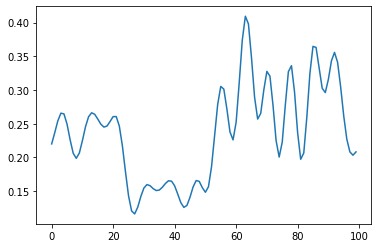

In [132]:
import matplotlib.pyplot as plt
plt.plot(keypoints_interp[0][:,0])

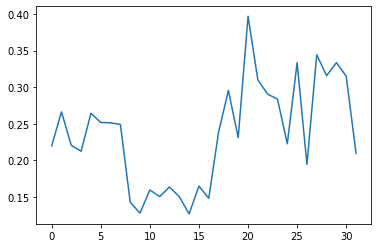

In [131]:
plt.plot(dataset_filter['Feature'][0][:,0])

In [116]:
dataset_interp['Feature'] = keypoints_interp

In [117]:
dataset_interp.head()

,Feature,Label
0,"[[0.21997947083296537, 0.40994740418332165, 0....",10.0
1,"[[0.35118453378666226, 0.6100496690636887, 0.8...",1.0
2,"[[0.15293741057745389, 0.26858043749441046, 0....",13.0
3,"[[0.17019057048619474, 0.3269422550161026, 0.4...",24.0
4,"[[0.3967425193130189, 0.5476169333737406, 0.57...",6.0


In [118]:
msk = np.random.rand(len(dataset_interp)) < 0.8
dataset_train = dataset_interp[msk].reset_index(drop=True)
dataset_test = dataset_interp[~msk].reset_index(drop=True)

In [139]:
dataset_test.head()

,Feature,Label
0,"[[0.17019057048619474, 0.3269422550161026, 0.4...",24.0
1,"[[0.33554664095255393, 0.45781068830546306, 0....",1.0
2,"[[0.21204336263025864, 0.4172197205403956, 0.6...",4.0
3,"[[0.19996926496332035, 0.3878370577378932, 0.5...",16.0
4,"[[0.0966849820827576, 0.2973193267172763, 0.49...",11.0


In [120]:
np.array(dataset_train.values[:,0].tolist()).shape

(3084, 100, 273)

In [121]:
np.array(dataset_train.values[:,1].tolist()).shape

(3084,)

In [122]:
np.array(dataset_test.values[:,0].tolist()).shape

(711, 100, 273)

In [123]:
np.array(dataset_test.values[:,1].tolist()).shape

(711,)

In [135]:
import torch
train_x = torch.tensor(dataset_train.values[:,0].tolist()).float()
train_y = torch.tensor(dataset_train.values[:,1].tolist()).int()
test_x = torch.tensor(dataset_test.values[:,0].tolist()).float()
test_y = torch.tensor(dataset_test.values[:,1].tolist()).int()

In [136]:
torch.save(train_x, 'data/jester_273_train_x.pt')
torch.save(train_y, 'data/jester_273_train_y.pt')
torch.save(test_x, 'data/jester_273_test_x.pt')
torch.save(test_y, 'data/jester_273_test_y.pt')

In [138]:
torch.save(train_x[:,:,210:210+42], 'data/jester_42_train_x.pt')
torch.save(test_x[:,:,210:210+42], 'data/jester_42_test_x.pt')
torch.save(train_y, 'data/jester_42_train_y.pt')
torch.save(test_y, 'data/jester_42_test_y.pt')

## SHREC2017

In [45]:
import itertools
import numpy
import torch
import pickle
from scipy import ndimage as ndimage
from sklearn.utils import shuffle
import time
import math

In [46]:
def load_data(filepath='data/shrec_data.pckl'):
    """
    Returns hand gesture sequences (X) and their associated labels (Y).
    Each sequence has two different labels.
    The first label  Y describes the gesture class out of 14 possible gestures (e.g. swiping your hand to the right).
    The second label Y describes the gesture class out of 28 possible gestures (e.g. swiping your hand to the right with your index pointed, or not pointed).
    """
    file = open(filepath, 'rb')
    data = pickle.load(file, encoding='latin1')  # <<---- change to 'latin1' to 'utf8' if the data does not load
    file.close()
    return data['x_train'], data['x_test'], data['y_train_14'], data['y_train_28'], data['y_test_14'], data['y_test_28']

def resize_sequences_length(x_train, x_test, final_length=100):
    """
    Resize the time series by interpolating them to the same length
    """
    # please use python3. if you still use python2, important note: redefine the classic division operator / by importing it from the __future__ module
    x_train = numpy.array([numpy.array([ndimage.zoom(x_i.T[j], final_length / len(x_i), mode='reflect') for j in range(numpy.size(x_i, 1))]).T for x_i in x_train])
    x_test  = numpy.array([numpy.array([ndimage.zoom(x_i.T[j], final_length / len(x_i), mode='reflect') for j in range(numpy.size(x_i, 1)) ]).T for x_i in x_test])
    return x_train, x_test

def shuffle_dataset(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28):
    """Shuffle the train/test data consistently."""
    # note: add random_state=0 for reproducibility
    x_train, y_train_14, y_train_28 = shuffle(x_train, y_train_14, y_train_28)
    x_test,  y_test_14,  y_test_28  = shuffle(x_test,  y_test_14,  y_test_28)
    return x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28

def preprocess_data(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28):
    """
    Preprocess the data as you want: update as you want!
        - possible improvement idea: make a PCA here
    """
    x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28 = shuffle_dataset(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28)
    x_train, x_test = resize_sequences_length(x_train, x_test, final_length=100)
    return x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28

def convert_to_pytorch_tensors(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28):
    # as numpy
    y_train_14, y_train_28, y_test_14, y_test_28 = numpy.array(y_train_14), numpy.array(y_train_28), numpy.array(y_test_14), numpy.array(y_test_28)
    
    # -- REQUIRED by the pytorch loss function implementation --
    # Remove 1 to all classes items (1-14 => 0-13 and 1-28 => 0-27)
    y_train_14, y_train_28, y_test_14, y_test_28 = y_train_14 - 1, y_train_28 - 1, y_test_14 - 1, y_test_28 - 1
    
    # as torch
    x_train, x_test = torch.from_numpy(x_train), torch.from_numpy(x_test)
    y_train_14, y_train_28, y_test_14, y_test_28 = torch.from_numpy(y_train_14), torch.from_numpy(y_train_28), torch.from_numpy(y_test_14), torch.from_numpy(y_test_28)

    # -- REQUIRED by the pytorch loss function implementation --
    # correct the data type (for the loss function used)
    x_train, x_test = x_train.type(torch.FloatTensor), x_test.type(torch.FloatTensor)
    y_train_14, y_train_28, y_test_14, y_test_28 = y_train_14.type(torch.LongTensor), y_train_28.type(torch.LongTensor), y_test_14.type(torch.LongTensor), y_test_28.type(torch.LongTensor)
    
    return x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28

In [47]:
# Load the dataset
x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28 = load_data()

# Shuffle sequences and resize sequences
x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28 = preprocess_data(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28)

# Convert to pytorch variables
x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28 = convert_to_pytorch_tensors(x_train, x_test, y_train_14, y_train_28, y_test_14, y_test_28)

In [49]:
torch.save(x_train, 'data/shrec_train_x.pt')
torch.save(y_train_14, 'data/shrec_train_y.pt')
torch.save(x_test, 'data/shrec_test_x.pt')
torch.save(y_test_14, 'data/shrec_test_y.pt')